# Exploratory Data Analysis - Vehicle Claim Fraud Detection

This notebook provides an exploratory analysis of the vehicle claim fraud dataset downloaded from Kaggle.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = os.path.join('..', 'data', 'fraud_oracle.csv')
data = pd.read_csv(data_path)
print('Dataset shape:', data.shape)
data.head()

Dataset shape: (15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## Distribution of Selected Numeric Features

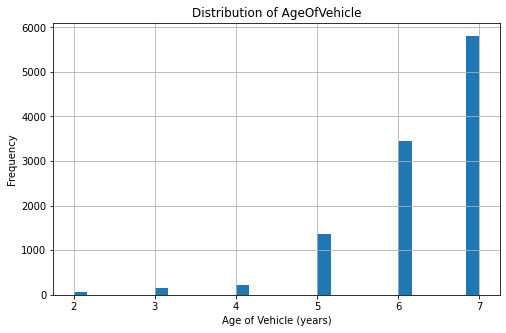

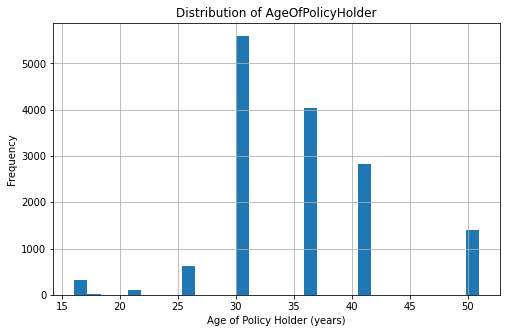

In [2]:
import numpy as np

def extract_number(x):
    try:
        token = x.split()[0]
        return float(token)
    except ValueError:
        # If conversion fails (e.g., token is "more"), return NaN
        return np.nan

def robust_extract_number(x):
    try:
        token = x.split()[0]
        return float(token)
    except Exception:
        return np.nan

# Plot distribution for 'AgeOfVehicle' if available
if 'AgeOfVehicle' in data.columns:
    plt.figure(figsize=(8,5))
    # Use our robust function and drop NaN values afterward
    numeric_vals = data['AgeOfVehicle'].dropna().apply(extract_number)
    numeric_vals = numeric_vals.dropna()  # remove values that couldn't be converted
    numeric_vals.hist(bins=30)
    plt.title('Distribution of AgeOfVehicle')
    plt.xlabel('Age of Vehicle (years)')
    plt.ylabel('Frequency')
    plt.show()

if 'AgeOfPolicyHolder' in data.columns:
    plt.figure(figsize=(8,5))
    numeric_vals = data['AgeOfPolicyHolder'].dropna().apply(robust_extract_number)
    numeric_vals = numeric_vals.dropna()  # Drop values that couldn't be converted
    numeric_vals.hist(bins=30)
    plt.title('Distribution of AgeOfPolicyHolder')
    plt.xlabel('Age of Policy Holder (years)')
    plt.ylabel('Frequency')
    plt.show()

## Correlation Matrix of Selected Features

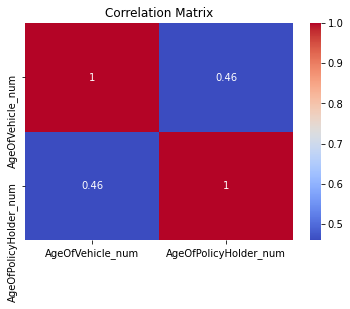

In [3]:
import numpy as np

def extract_num(x):
    try:
        return float(x.split()[0])
    except:
        return np.nan

# Convert string features to numeric if possible
for col in ['AgeOfVehicle', 'AgeOfPolicyHolder']:
    if col in data.columns:
        data[col + '_num'] = data[col].dropna().apply(extract_num)

numeric_cols = [col for col in data.columns if col.endswith('_num')]
corr = data[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()